In [ ]:
import os
from google.colab import drive 
drive.mount('/content/drive')
cwd ="/content/drive/MyDrive/Colab Notebooks/Object Detection"
os.chdir(cwd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Object Detection


In [ ]:
import numpy as np
import cv2
import sys
#from google.colab.patches import cv2_imshow


In [ ]:
image_path ='people.jpg'
prototxt_path ='models/MobileNetSSD_deploy.prototxt.txt'
model_path = 'models/MobileNetSSD_deploy.caffemodel'
min_confidence = 0.2

classes = ['background','aeroplane', 'bicycle','bird',
           'boat','bottle', 'bus','car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']



In [ ]:
np.random.seed(543210)
colors = np.random.uniform(0 ,255 ,size=(len(classes) ,3 ))
net = cv2.dnn.readNetFromCaffe(prototxt_path ,model_path )

image = cv2.imread(image_path)
height, width = image.shape[0] , image.shape[1]
blop = cv2.dnn.blobFromImage(cv2.resize(image ,(300 ,300)) ,0.007 ,(300 ,300) ,130)

net.setInput(blop)
detected_objects = net.forward() 

# print(detected_objects[0][0][5]) 

In [ ]:
for i in range(detected_objects.shape[2]):
    confidence = detected_objects[0][0][i][2]

    if confidence > min_confidence :
        class_index =int(detected_objects[0, 0, i, 1])

        upper_left_x =int(detected_objects[0, 0, i, 3] * width)
        upper_left_y =int(detected_objects[0, 0, i, 4] * height)
        lower_right_x =int(detected_objects[0, 0, i, 5] * width)
        lower_right_y =int(detected_objects[0, 0, i, 6] * height)

        prediction_text = f"{classes[class_index]}: {confidence:.2f}% "
        cv2.rectangle(image,(upper_left_x,upper_left_y) , (lower_right_x ,lower_right_y ) ,colors[class_index])
        cv2.putText(image ,prediction_text , (upper_left_x ,
                    upper_left_y - 15 if upper_left_y > 30 else upper_left_y +15 ),
                    cv2.FONT_ITALIC ,0.6 ,colors[class_index] ,2) 
       

In [ ]:
 #FONT_HERSHEY_SIMPLEX

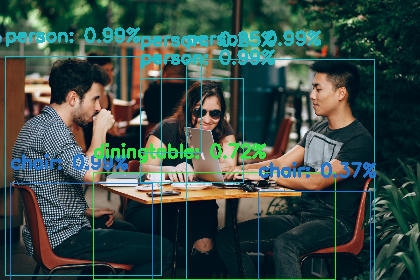

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

#cv2.imshow("Detected Objects" ,image)
cv2.waitKey(0)
cv2.destroyAllWindows() 